# Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones

Edición 2022

In [1]:
# !pip install emoji==1.6.3
import torch 

# First checking if GPU is available
train_on_gpu = torch.cuda.is_available()

if(train_on_gpu):    
    print("Training on GPU.")    
else:    
    print("No GPU available, training on CPU.")

Training on GPU.


In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import os

import functools
import emoji
import operator
import re
from string import punctuation
from collections import Counter
#from google.colab import drive

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tag import pos_tag, map_tag

sns.set_context('talk')
np.set_printoptions(suppress=True)  # no usar notacion "e"

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sheldon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sheldon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sheldon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sheldon\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sheldon\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\sheldon\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset 

In [3]:
# Declaramos la ruta principal
# google_drive = "/content/gdrive"
# root_path = os.path.join(google_drive, "My Drive", "Colab Notebooks", "mentodatos", "tercerentrega")

In [4]:
# load dataset
df = pd.read_csv(os.path.join(os.getcwd(), "data", "news_dataset.csv"))

df.head()

,id,ticker,title,category,content,release_date,provider,url,article_id
0,221515,NIO,Why Shares of Chinese Electric Car Maker NIO A...,news,What s happening\nShares of Chinese electric c...,2020-01-15,The Motley Fool,https://invst.ly/pigqi,2060327
1,221516,NIO,NIO only consumer gainer Workhorse Group amon...,news,Gainers NIO NYSE NIO 7 \nLosers MGP Ingr...,2020-01-18,Seeking Alpha,https://invst.ly/pje9c,2062196
2,221517,NIO,NIO leads consumer gainers Beyond Meat and Ma...,news,Gainers NIO NYSE NIO 14 Village Farms In...,2020-01-15,Seeking Alpha,https://invst.ly/pifmv,2060249
3,221518,NIO,NIO NVAX among premarket gainers,news,Cemtrex NASDAQ CETX 85 after FY results \n...,2020-01-15,Seeking Alpha,https://invst.ly/picu8,2060039
4,221519,NIO,PLUG NIO among premarket gainers,news,aTyr Pharma NASDAQ LIFE 63 on Kyorin Pharm...,2020-01-06,Seeking Alpha,https://seekingalpha.com/news/3529772-plug-nio...,2053096


In [5]:
df.category.value_counts(dropna=False)

opinion    125935
news        95578
Name: category, dtype: int64

In [6]:
# dataset dimension
df.shape

(221513, 9)

In [7]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221513 entries, 0 to 221512
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            221513 non-null  int64 
 1   ticker        221513 non-null  object
 2   title         221513 non-null  object
 3   category      221513 non-null  object
 4   content       221505 non-null  object
 5   release_date  221513 non-null  object
 6   provider      221513 non-null  object
 7   url           221513 non-null  object
 8   article_id    221513 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 15.2+ MB


In [8]:
df.head(5)

,id,ticker,title,category,content,release_date,provider,url,article_id
0,221515,NIO,Why Shares of Chinese Electric Car Maker NIO A...,news,What s happening\nShares of Chinese electric c...,2020-01-15,The Motley Fool,https://invst.ly/pigqi,2060327
1,221516,NIO,NIO only consumer gainer Workhorse Group amon...,news,Gainers NIO NYSE NIO 7 \nLosers MGP Ingr...,2020-01-18,Seeking Alpha,https://invst.ly/pje9c,2062196
2,221517,NIO,NIO leads consumer gainers Beyond Meat and Ma...,news,Gainers NIO NYSE NIO 14 Village Farms In...,2020-01-15,Seeking Alpha,https://invst.ly/pifmv,2060249
3,221518,NIO,NIO NVAX among premarket gainers,news,Cemtrex NASDAQ CETX 85 after FY results \n...,2020-01-15,Seeking Alpha,https://invst.ly/picu8,2060039
4,221519,NIO,PLUG NIO among premarket gainers,news,aTyr Pharma NASDAQ LIFE 63 on Kyorin Pharm...,2020-01-06,Seeking Alpha,https://seekingalpha.com/news/3529772-plug-nio...,2053096


In [ ]:
#df = df[["text", "label"]]
#df

In [9]:
# check for missing values
df.isnull().sum()

id              0
ticker          0
title           0
category        0
content         8
release_date    0
provider        0
url             0
article_id      0
dtype: int64

In [10]:
df = df[["content", "title", "category"]]

In [11]:
df.head()

,content,title,category
0,What s happening\nShares of Chinese electric c...,Why Shares of Chinese Electric Car Maker NIO A...,news
1,Gainers NIO NYSE NIO 7 \nLosers MGP Ingr...,NIO only consumer gainer Workhorse Group amon...,news
2,Gainers NIO NYSE NIO 14 Village Farms In...,NIO leads consumer gainers Beyond Meat and Ma...,news
3,Cemtrex NASDAQ CETX 85 after FY results \n...,NIO NVAX among premarket gainers,news
4,aTyr Pharma NASDAQ LIFE 63 on Kyorin Pharm...,PLUG NIO among premarket gainers,news


In [12]:
df.category.value_counts(dropna=False)

opinion    125935
news        95578
Name: category, dtype: int64

In [14]:
df["new_content"] = df["content"] + df["title"]

df = df[["new_content", "category"]]

df.head()

,new_content,category
0,What s happening\nShares of Chinese electric c...,news
1,Gainers NIO NYSE NIO 7 \nLosers MGP Ingr...,news
2,Gainers NIO NYSE NIO 14 Village Farms In...,news
3,Cemtrex NASDAQ CETX 85 after FY results \n...,news
4,aTyr Pharma NASDAQ LIFE 63 on Kyorin Pharm...,news


In [15]:
def pad_features(comments_ints, seq_length):
    ''' Return features of comments_ints, where each comment is padded with 0's 
        or truncated to the input seq_length.
    '''
    # getting the correct rows x cols shape
    features = np.zeros((len(comments_ints), seq_length), dtype=int)
    for i, row in enumerate(comments_ints):
        features[i, -len(row):] = np.array(row)[:seq_length]
    return features


def encoding_words(comment, vocab):
    '''Use the vocab to tokenize each the comment
    Returns tokenized comment as comment_int'''
    
    comments_ints = [vocab[word] if word in vocab.keys() else 0 for word in comment.split()]
    return comments_ints

def dictionary_int(text):
    '''Build a dictionary that maps words to integers'''
    words = text.split()
    print(len(words))
    counts = Counter(words) #the words and their counts are stored as dictionary values
    print(counts, len(counts))
    vocabulary = sorted(counts.keys()) #words ordered alphabetically
    vocab_to_int = {word: ii for ii, word in enumerate(vocabulary, 1)}
    return vocab_to_int

def get_cleantext(text):
    '''Get text(comment). Returns the clean text'''
    text = text.lower() #lowercase, standardize
    text = re.sub(r"\d+", " ", text)
    split_emoji = emoji.get_emoji_regexp().split(text)#separate emojis from text)
    split_whitespace = [substr.split() for substr in split_emoji]#split emojis together
    list_text = functools.reduce(operator.concat, split_whitespace)#delete withespace caused by emojis
    new_list = []
    p = re.compile(r'[a-z-áéíóúñ]+')#search only words
    for word in list_text:
        if not emoji.is_emoji(word):
            word = ' '.join(p.findall(word)) #example  "mensaje...con" split = "mensaje con"
            word = re.sub(r'([abdefghijkmopqsu-zÀ-ÿ])\1{1,}', r'\1', word)
            if 'jaja' in word:
                word = 'jaja'
            if 'jeje' in word:
                word = 'jeje'
            if 'jiji' in word:
                word = 'jiji'
     
        new_list.append(word)

    text = ' '.join(new_list)
    
    return text

def foo(data):
    '''get list of dictionaries. Returns a list of numbers corresponding to the vocabulary'''
    list_comment = [str(item).lower() for item in data['new_content']]
    list_comment = [get_cleantext(comment) for comment in list_comment]
    all_text = ' '.join(list_comment)
    vocab = dictionary_int(all_text)
    list_comment_ints = [encoding_words(comment,vocab) for comment in list_comment]
    array_comments = pad_features(list_comment_ints, seq_length=70) #define length for comments
    labels = np.array([1 if item == 'opinion' else 0 for item in data['category']])
    return array_comments, labels, vocab, list_comment_ints

In [16]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [17]:
# f = open(os.path.join(os.getcwd(), "data", "vocab.json"),"w")
# f.write(str(vocab))
# f.close()

In [18]:
get_cleantext('holaaa CÓMO ESTÁS 222 jajajaajaja ejejej 😃!!..')

'hola cómo estás jaja jeje 😃 '

In [19]:
features, labels, vocab, list_comment_ints = foo(df)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Text(0.5, 1.0, 'Histograma')

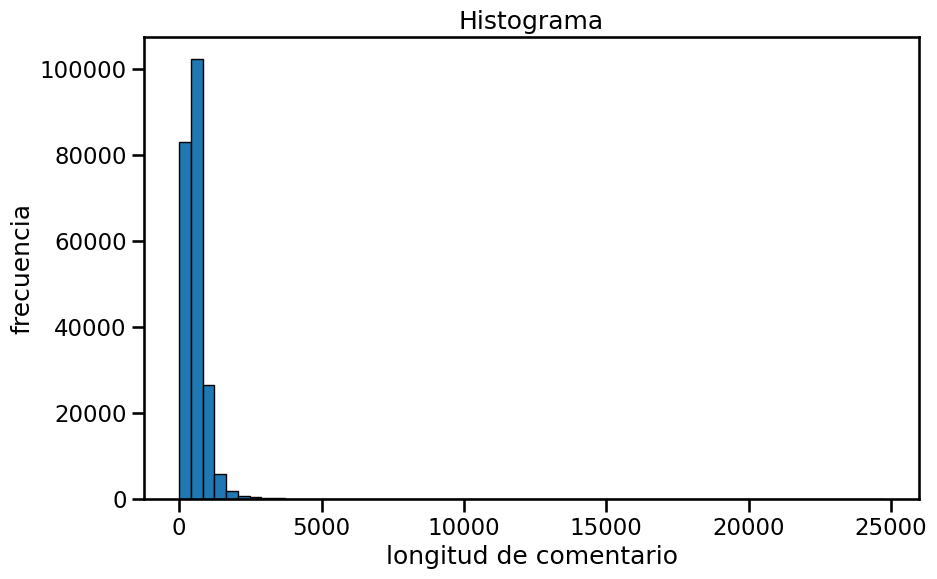

In [20]:
plt.figure(figsize=(10,6))
plt.hist(list(map(len, list_comment_ints)), bins=60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.xlabel("longitud de comentario")
plt.ylabel("frecuencia")
plt.title("Histograma")

In [21]:
# separar emojis juntos, eliminar numeros y 'mensaje...mensaje'
msj = 'Este es un mensaje...con este problema😃😃😃 222 pero igual!!! '
msj = get_cleantext(msj)
msj = encoding_words(msj,vocab)
msj

[91765, 91200, 317671, 0, 53899, 91765, 239898, 0, 0, 0, 0, 0]

In [22]:
len(vocab)

360994

In [23]:
#guardar como diccionario
import pickle
with open("vocab.pkl", 'wb') as f:
    pickle.dump(vocab, f)

In [24]:
# Datos de Entrenamiento, Validación y Prueba
import torch
from torch.utils.data import TensorDataset, DataLoader


def get_sets(features, labels, batch_size, split_frac):
    '''Returns sets training, validation, and test data (features and labels, x and y)'''
    split_idx = int(len(features)*split_frac) #quantity of data for training
    train_x, remaining_x = features[:split_idx], features[split_idx:]
    train_y, remaining_y = labels[:split_idx], labels[split_idx:]

    test_idx = int(len(remaining_x)*0.5)
    val_x, test_x = remaining_x[:test_idx], remaining_x[test_idx:]
    val_y, test_y = remaining_y[:test_idx], remaining_y[test_idx:]

    # remove the lasts batch if not has completed
    train_x = train_x[:int(split_idx/batch_size)*batch_size]
    train_y = train_y[:int(split_idx/batch_size)*batch_size]

    val_x = val_x[:int(test_idx/batch_size)*batch_size]
    val_y = val_y[:int(test_idx/batch_size)*batch_size]

    test_x = test_x[:int(test_idx/batch_size)*batch_size]
    test_y = test_y[:int(test_idx/batch_size)*batch_size]

    ## print out the shapes of your resultant feature data
    print("\t\t\tFeature Shapes:")
    print("Train set: \t\t{}".format(train_x.shape), 
      "\nValidation set: \t{}".format(val_x.shape),
      "\nTest set: \t\t{}".format(test_x.shape))

    # create Tensor datasets
    train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
    valid_data = TensorDataset(torch.from_numpy(val_x), torch.from_numpy(val_y))
    test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))

    # make sure the SHUFFLE your training data
    train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
    valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
    test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

    return train_loader, valid_loader, test_loader

In [25]:
batch_size = 20

train_loader, valid_loader, test_loader = get_sets(features, labels, batch_size, split_frac=0.8)

print('')
print('cantidad lotes del train_loader', len(train_loader))
print('cantidad lotes del valid_loader', len(valid_loader))
print('cantidad lotes del test_loader', len(test_loader))

			Feature Shapes:
Train set: 		(177200, 70) 
Validation set: 	(22140, 70) 
Test set: 		(22140, 70)

cantidad lotes del train_loader 8860
cantidad lotes del valid_loader 1107
cantidad lotes del test_loader 1107


In [26]:
cont =0
for inputs, labels in train_loader:
    cont+=1
    print(labels, cont)

tensor([0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       dtype=torch.int32) 1
tensor([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1],
       dtype=torch.int32) 2
tensor([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0],
       dtype=torch.int32) 3
tensor([1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0],
       dtype=torch.int32) 4
tensor([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1],
       dtype=torch.int32) 5
tensor([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1],
       dtype=torch.int32) 6
tensor([0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1],
       dtype=torch.int32) 7
tensor([1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0],
       dtype=torch.int32) 8
tensor([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1],
       dtype=torch.int32) 9
tensor([0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1],
       dtype=torch.int32) 10
tensor([1, 0, 0, 0, 0, 1, 1, 

tensor([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1],
       dtype=torch.int32) 857
tensor([0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1],
       dtype=torch.int32) 858
tensor([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1],
       dtype=torch.int32) 859
tensor([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1],
       dtype=torch.int32) 860
tensor([1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
       dtype=torch.int32) 861
tensor([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1],
       dtype=torch.int32) 862
tensor([1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1],
       dtype=torch.int32) 863
tensor([1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1],
       dtype=torch.int32) 864
tensor([1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0],
       dtype=torch.int32) 865
tensor([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1],
       dtype=torch.int32) 866
tensor([1,

tensor([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
       dtype=torch.int32) 1813
tensor([1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0],
       dtype=torch.int32) 1814
tensor([1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1],
       dtype=torch.int32) 1815
tensor([0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1],
       dtype=torch.int32) 1816
tensor([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1],
       dtype=torch.int32) 1817
tensor([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1],
       dtype=torch.int32) 1818
tensor([1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0],
       dtype=torch.int32) 1819
tensor([1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1],
       dtype=torch.int32) 1820
tensor([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1],
       dtype=torch.int32) 1821
tensor([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0],
       dtype=torch.int32) 1822


tensor([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1],
       dtype=torch.int32) 2807
tensor([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1],
       dtype=torch.int32) 2808
tensor([0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       dtype=torch.int32) 2809
tensor([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
       dtype=torch.int32) 2810
tensor([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1],
       dtype=torch.int32) 2811
tensor([1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0],
       dtype=torch.int32) 2812
tensor([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0],
       dtype=torch.int32) 2813
tensor([1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0],
       dtype=torch.int32) 2814
tensor([0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0],
       dtype=torch.int32) 2815
tensor([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0],
       dtype=torch.int32) 2816


tensor([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1],
       dtype=torch.int32) 3809
tensor([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0],
       dtype=torch.int32) 3810
tensor([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0],
       dtype=torch.int32) 3811
tensor([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0],
       dtype=torch.int32) 3812
tensor([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1],
       dtype=torch.int32) 3813
tensor([1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0],
       dtype=torch.int32) 3814
tensor([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1],
       dtype=torch.int32) 3815
tensor([1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
       dtype=torch.int32) 3816
tensor([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0],
       dtype=torch.int32) 3817
tensor([1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0],
       dtype=torch.int32) 3818


tensor([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1],
       dtype=torch.int32) 4767
tensor([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       dtype=torch.int32) 4768
tensor([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0],
       dtype=torch.int32) 4769
tensor([0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0],
       dtype=torch.int32) 4770
tensor([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0],
       dtype=torch.int32) 4771
tensor([0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0],
       dtype=torch.int32) 4772
tensor([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0],
       dtype=torch.int32) 4773
tensor([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1],
       dtype=torch.int32) 4774
tensor([1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1],
       dtype=torch.int32) 4775
tensor([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0],
       dtype=torch.int32) 4776


tensor([1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1],
       dtype=torch.int32) 5806
tensor([1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1],
       dtype=torch.int32) 5807
tensor([1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1],
       dtype=torch.int32) 5808
tensor([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1],
       dtype=torch.int32) 5809
tensor([1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0],
       dtype=torch.int32) 5810
tensor([0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1],
       dtype=torch.int32) 5811
tensor([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0],
       dtype=torch.int32) 5812
tensor([0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1],
       dtype=torch.int32) 5813
tensor([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1],
       dtype=torch.int32) 5814
tensor([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1],
       dtype=torch.int32) 5815


tensor([1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       dtype=torch.int32) 6842
tensor([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0],
       dtype=torch.int32) 6843
tensor([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1],
       dtype=torch.int32) 6844
tensor([0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1],
       dtype=torch.int32) 6845
tensor([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1],
       dtype=torch.int32) 6846
tensor([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1],
       dtype=torch.int32) 6847
tensor([0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1],
       dtype=torch.int32) 6848
tensor([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1],
       dtype=torch.int32) 6849
tensor([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1],
       dtype=torch.int32) 6850
tensor([0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0],
       dtype=torch.int32) 6851


tensor([1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1],
       dtype=torch.int32) 7813
tensor([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1],
       dtype=torch.int32) 7814
tensor([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1],
       dtype=torch.int32) 7815
tensor([0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1],
       dtype=torch.int32) 7816
tensor([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0],
       dtype=torch.int32) 7817
tensor([1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1],
       dtype=torch.int32) 7818
tensor([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1],
       dtype=torch.int32) 7819
tensor([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1],
       dtype=torch.int32) 7820
tensor([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       dtype=torch.int32) 7821
tensor([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1],
       dtype=torch.int32) 7822


tensor([1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1],
       dtype=torch.int32) 8846
tensor([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1],
       dtype=torch.int32) 8847
tensor([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
       dtype=torch.int32) 8848
tensor([1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1],
       dtype=torch.int32) 8849
tensor([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1],
       dtype=torch.int32) 8850
tensor([0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1],
       dtype=torch.int32) 8851
tensor([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0],
       dtype=torch.int32) 8852
tensor([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0],
       dtype=torch.int32) 8853
tensor([1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1],
       dtype=torch.int32) 8854
tensor([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0],
       dtype=torch.int32) 8855


In [27]:
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([20, 70])
Sample input: 
 tensor([[ 35520, 260504, 117274,  ..., 253792, 305248,  27540],
        [ 38588,  38815, 157764,  ..., 338373, 337602, 269444],
        [ 38588, 113525, 283447,  ...,  93267, 290152,  15277],
        ...,
        [303089, 260060, 338757,  ..., 225959, 211508, 163908],
        [205759, 285795,  58631,  ..., 248517, 225959,   6827],
        [145374,  52240,  22022,  ..., 214493, 260592, 211508]],
       dtype=torch.int32)

Sample label size:  torch.Size([20])
Sample label: 
 tensor([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       dtype=torch.int32)


Modelo de Red RNN

In [28]:
# First checking if GPU is available
train_on_gpu = torch.cuda.is_available()

if(train_on_gpu):    
    print("Training on GPU.")    
else:    
    print("No GPU available, training on CPU.")

Training on GPU.


In [29]:
torch.cuda.is_available()

True

In [31]:
import torch.nn as nn

class SentimentRNN(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.3):
        """
        Initialize the model by setting up the layers.
        """
        super(SentimentRNN, self).__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        x = x.long()
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
        
        lstm_out = lstm_out[:, -1, :] # getting the last time step output
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

# Inicializacion de la red
* `vocab_size`: Tamaño del vocabulario o rango de valores para nuestra entrada, tokens de palabras.
* `output_size`: Tamaño de la salida deseada (pos / neg).
* `embedding_dim`: Número de columnas en la tabla de embedding.
* `hidden_dim`: Número de nodos en capas ocultas. Por lo general, más grande tiene un mejor rendimiento. Los valores comnues son 128, 256, 512, etc.
* `n_layers`: Número de capas LSTM en la red. Normalmente entre 1-3

In [32]:
vocab_size = len(vocab)+1 # +1 for the 0 padding + our word tokens
output_size = 1
embedding_dim = 50
hidden_dim = 128
n_layers = 4

net = SentimentRNN(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)

print(net)

SentimentRNN(
  (embedding): Embedding(360995, 50)
  (lstm): LSTM(50, 128, num_layers=4, batch_first=True, dropout=0.3)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=128, out_features=1, bias=True)
  (sig): Sigmoid()
)


## Training

* `lr`: Tasa de aprendizaje.
* `epochs`: Número de veces que se itera a través del conjunto de datos de entrenamiento.
* `clip`: El valor de degradado máximo al que se recortará (para evitar la explosión de degradados).

In [33]:
def training_net(net, batch_size, train_loader, valid_loader):
  lr=0.001
  criterion = nn.BCELoss()
  optimizer = torch.optim.Adam(net.parameters(), lr=lr)
  epochs = 10
  counter = 0
  print_every = 100
  clip = 5 # gradient clipping

  # move model to GPU, if available
  if(train_on_gpu):
    net.cuda()
  net.train()

  train_losses, test_losses = [], []
  # train for some number of epochs
  for e in range(epochs):
    running_loss = 0 #######
    # initialize hidden state
    h = net.init_hidden(batch_size)    
    
    # batch loop    
    for inputs, labels in train_loader: 
      counter += 1
      if(train_on_gpu):  
        inputs, labels = inputs.cuda(), labels.cuda()
      
      # Creating new variables for the hidden state, otherwise
      # we'd backprop through the entire training history
      h = tuple([each.data for each in h])
      
      # zero accumulated gradients
      net.zero_grad()

      # get the output from the model
      output, h = net(inputs, h)
      # calculate the loss and perform backprop
      loss = criterion(output.squeeze(), labels.float())
      loss.backward()

      # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
      nn.utils.clip_grad_norm_(net.parameters(), clip)
      optimizer.step()
      running_loss += loss.item()
      
      # loss stats
      if counter % print_every == 0:
        # Get validation loss
        val_h = net.init_hidden(batch_size)
        val_losses = []
        net.eval()
        for inputs, labels in valid_loader:
          
          # Creating new variables for the hidden state, otherwise
          # we'd backprop through the entire training history
          val_h = tuple([each.data for each in val_h])
          if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()            
          output, val_h = net(inputs, val_h)          
          val_loss = criterion(output.squeeze(), labels.float())

          val_losses.append(val_loss.item())

        net.train()
        print("Epoch: {}/{}...".format(e+1, epochs),
                "Step: {}...".format(counter),
                "Loss: {:.6f}...".format(loss.item()),
                "Val Loss: {:.6f}".format(np.mean(val_losses)))

In [34]:
#Utilizar este
import matplotlib.pyplot as plt

def training_net1(net, batch_size, train_loader, valid_loader):
  lr=0.001
  criterion = nn.BCELoss()
  optimizer = torch.optim.Adam(net.parameters(), lr=lr)
  epochs = 10
  counter = 0
  print_every = 100
  clip=5 # gradient clipping

  # move model to GPU, if available
  if(train_on_gpu):
    net.cuda()
  net.train()

  train_losses, validation_losses = [], []
  # train for some number of epochs
  for e in range(epochs):
    running_loss = 0
    # initialize hidden state
    h = net.init_hidden(batch_size)    
    
    # batch loop    
    for inputs, labels in train_loader: 
      counter += 1
      if(train_on_gpu):  
        inputs, labels = inputs.cuda(), labels.cuda()
      
      # Creating new variables for the hidden state, otherwise
      # we'd backprop through the entire training history
      h = tuple([each.data for each in h])
      
      # zero accumulated gradients
      net.zero_grad()

      # get the output from the model
      output, h = net(inputs, h)
      # calculate the loss and perform backprop
      loss = criterion(output.squeeze(), labels.float())
      loss.backward()

      # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
      nn.utils.clip_grad_norm_(net.parameters(), clip)
      optimizer.step()
      running_loss += loss.item()
    
    else:
      val_h = net.init_hidden(batch_size)
      val_losses = []      
      with torch.no_grad():
        net.eval()
        for inputs, labels in valid_loader:
          # Creating new variables for the hidden state, otherwise
          # we'd backprop through the entire training history
          val_h = tuple([each.data for each in val_h])
          if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()            
          output, val_h = net(inputs, val_h)          
          val_loss = criterion(output.squeeze(), labels.float())

          val_losses.append(val_loss.item())
      net.train() 
      print("Epoch: {}/{}...".format(e+1, epochs),
              "Step: {}...".format(counter),
              "Loss: {:.6f}...".format(running_loss/len(train_loader)),
              "Val Loss: {:.6f}".format(np.mean(val_losses)))

    train_losses.append(running_loss/len(train_loader))
    validation_losses.append(np.mean(val_losses))
  
  plt.plot(train_losses, label='Training losses')
  plt.plot(validation_losses, label='Validation losses')
  plt.legend(frameon=False)

In [35]:
print(len(train_loader))
print(len(valid_loader))

8860
1107


Epoch: 1/10... Step: 8860... Loss: 0.578735... Val Loss: 0.209878
Epoch: 2/10... Step: 17720... Loss: 0.159884... Val Loss: 0.152316
Epoch: 3/10... Step: 26580... Loss: 0.112949... Val Loss: 0.126550
Epoch: 4/10... Step: 35440... Loss: 0.090837... Val Loss: 0.128758
Epoch: 5/10... Step: 44300... Loss: 0.080093... Val Loss: 0.131831
Epoch: 6/10... Step: 53160... Loss: 0.070484... Val Loss: 0.142992
Epoch: 7/10... Step: 62020... Loss: 0.061923... Val Loss: 0.129601
Epoch: 8/10... Step: 70880... Loss: 0.055749... Val Loss: 0.136070
Epoch: 9/10... Step: 79740... Loss: 0.049243... Val Loss: 0.166957
Epoch: 10/10... Step: 88600... Loss: 0.044076... Val Loss: 0.148966


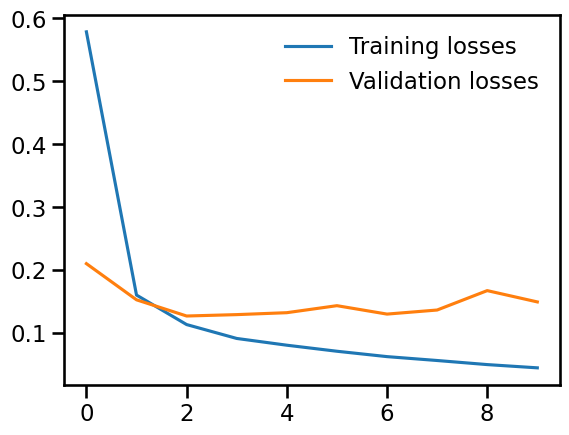

In [36]:
training_net1(net, batch_size, train_loader, valid_loader)

In [37]:
# Testing
def testing(net, test_loader):
  # Get test data loss and accuracy
  test_losses = [] # track loss
  num_correct = 0
  criterion = nn.BCELoss()
  #optimizer = torch.optim.Adam(net.parameters(), lr=lr)
  # init hidden state
  h = net.init_hidden(batch_size)

  net.eval()
  # iterate over test data
  for inputs, labels in test_loader:
      # Creating new variables for the hidden state, otherwise
      # we'd backprop through the entire training history
      h = tuple([each.data for each in h])

      if(train_on_gpu):
          inputs, labels = inputs.cuda(), labels.cuda()
      
      # get predicted outputs
      output, h = net(inputs, h)
    
      # calculate loss
      test_loss = criterion(output.squeeze(), labels.float())
      test_losses.append(test_loss.item())
      
      # convert output probabilities to predicted class (0 or 1)
      pred = torch.round(output.squeeze())  # rounds to the nearest integer
      
      # compare predictions to true label
      correct_tensor = pred.eq(labels.float().view_as(pred))
      correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
      num_correct += np.sum(correct)

  # -- stats! -- ##
  # avg test loss
  print("Test loss: {:.3f}".format(np.mean(test_losses)))

  # accuracy over all test data
  test_acc = num_correct/len(test_loader.dataset)
  print("Length the test data", len(test_loader))
  print("Test accuracy: {:.3f}".format(test_acc))

In [38]:
testing(net, test_loader)

Test loss: 0.188
Length the test data 1107
Test accuracy: 0.946


# Prueba usuario

In [39]:
def tokenize_comment(comment, vocab):
  test_ints = []
  comment = get_cleantext(comment)
  comment = encoding_words(comment,vocab)
  test_ints.append(comment)  
  comment = pad_features(test_ints, seq_length=100)
  return comment

def predict(net, test_comment, vocab ,sequence_length=100):
    
    net.eval()

    # tokenize review
    features = tokenize_comment(test_comment, vocab)
    
    # print('test int', test_ints)
    # # pad tokenized sequence
    # seq_length=sequence_length
    # features = pad_features(test_ints, seq_length)
    # print(features)
    
    # convert to tensor to pass into your model
    feature_tensor = torch.from_numpy(features)
    
    batch_size = feature_tensor.size(0)
    
    # initialize hidden state
    h = net.init_hidden(batch_size)
    
    if(train_on_gpu):
        feature_tensor = feature_tensor.cuda()
    
    # get the output from the model
    output, h = net(feature_tensor, h)
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze()) 
    # printing output value, before rounding
    print('Prediction value, pre-rounding: {:.6f}'.format(output.item()))
    
    # print custom response
    if(pred.item()==1):
        print("Opinion review detected!")
    else:
        print("News review detected.")
    return output.item()

In [40]:
test_comment = "Until commodities begin to break out of the downward price channels highlighted on this chart  global capital will be searching for two primary objectives  safety and hedged returns  By this  we mean to say that global capital and investment will seek out strong blue chip and mid cap performers that can produce safety in growth  dividends and hedge against currency swings or further eroding commodity price levels  Think of this as a move to key elements supporting the global economies"
predict(net, test_comment, vocab)

Prediction value, pre-rounding: 0.967400
Opinion review detected!


0.9673995971679688

# Descargar modelo

In [41]:
PATH = "./trainedModel.pth"
torch.save(net.state_dict(), PATH)